In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

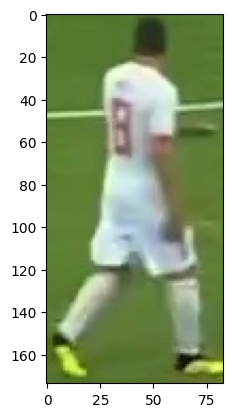

In [4]:
plt.imshow(image)
plt.show()

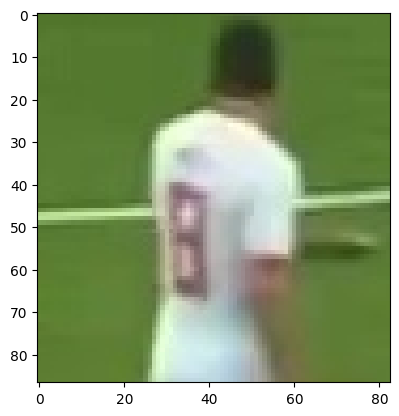

In [5]:
top_half_img = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_img)
plt.show()

Cluster Image

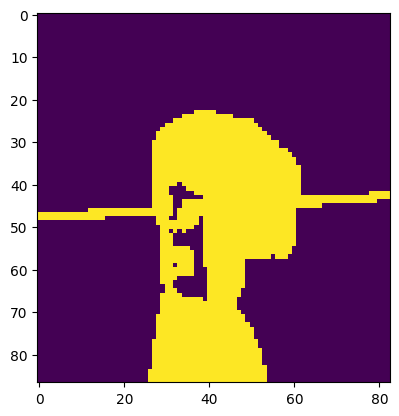

In [6]:
# Reshape img into 2d array
img_2d = top_half_img.reshape(-1, 3)

# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(img_2d)

labels = kmeans.labels_

# Reshape image back into original
clustered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

plt.imshow(clustered_img)
plt.show()

In [7]:
corner_clusters = [clustered_img[0,0], clustered_img[0,-1], clustered_img[-1,0], clustered_img[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)


0


In [8]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [9]:
kmeans.cluster_centers_[player_cluster]

array([195.56304985, 207.25630499, 194.20058651])